## Exploratory data analysis of the US Stock Financial indicators data set

#### Names of contributors: Anene Ifeanyi, Chizitere Igwe

### Dataset Summary

The data used in this project consists of 5 data sets:

- `2014_Financial_Data.csv`
- `2015_Financial_Data.csv`
- `2016_Financial_Data.csv`
- `2017_Financial_Data.csv`
- `2018_Financial_Data.csv`

The datasets were created by `Nicolas Carbone`. The datasets were sourced from kaggle's 200+ Financial Indicators of US stocks (2014-2018), and it can be found [here](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018), particularly this [file](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018/download).

Each dataset contains 200+ financial indicators, which are usually found in 10-K filings of publicly traded company yearly releases. There are some missing values in this dataset. Each row in each dataset represents a set of observations of different companies and each column represents a feature of the stock's future performance. These datasets can be used for a classification task, whereby if the value of the `PRICE VAR [%]` column is positive, the last column `class` = 1, which signifies that a hypothetical investor should BUY the stock at the start of the year and sell at the end of the year for a profit. Whilst, if the value of the `PRICE VAR [%]` column is negative, the column `class` = 0, which signifies that a hypothetical investor should NOT BUY the stock because its value will decrease by the end of the year. 

The datasets can also be used for a regression task, whereby the target column is the `PRICE VAR [%]` column.


### Problem Statement:

Given the financial stock indicators, should a hypothetical investor buy the stock or not?

In [57]:
# Import required exploratory data analysis packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train test split and cross validation
from sklearn.model_selection import train_test_split


In [2]:
df_2014 = pd.read_csv('data/raw/2014_Financial_Data.csv') # Home directory is working directory

df_2015 = pd.read_csv("data/raw/2015_Financial_Data.csv")

df_2016 = pd.read_csv("data/raw/2016_Financial_Data.csv")

df_2017 = pd.read_csv("data/raw/2017_Financial_Data.csv")

df_2018 = pd.read_csv("data/raw/2018_Financial_Data.csv")

### Housekeeping:


In [9]:
# Rename Unnamed:0 column to Ticker

df_2014 = df_2014.rename(columns={'Unnamed: 0': 'Ticker'})
df_2015 = df_2015.rename(columns={'Unnamed: 0': 'Ticker'})
df_2016 = df_2016.rename(columns={'Unnamed: 0': 'Ticker'})
df_2017 = df_2017.rename(columns={'Unnamed: 0': 'Ticker'})
df_2018 = df_2018.rename(columns={'Unnamed: 0': 'Ticker'})

In [21]:
df_2014

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.000000e+00,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,...,-0.0384,0.0000,-0.0041,-0.0049,0.0000,0.0000,0.0213,Technology,29.362884,1
3804,TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,1.132600e+07,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,...,0.1529,0.0000,-0.1872,0.1823,0.0000,0.2830,-0.0637,Technology,-31.167763,0
3805,USATP,4.200000e+07,NaN,2.700000e+07,1.500000e+07,NaN,1.400000e+07,1.500000e+07,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,-23.558900,0
3806,WSTG,3.407580e+08,0.1344,3.159480e+08,2.481000e+07,0.000000e+00,1.651300e+07,1.651300e+07,8.297000e+06,-4.720000e+05,...,-0.0333,0.1338,0.0023,0.0890,0.0000,0.0000,0.0650,Technology,7.779579,1


In [34]:
total_observations = len(df_2014)

total_features = len(df_2014.columns) - 2 # Subtracting the ticker column (Categorical variable) and the class column (target)

count_NA = df_2014.isna().sum().sum()

print(f"There is a total of {total_observations} observations, {total_features} features and {count_NA} observations with missing values in the dataset")

There is a total of 3808 observations, 223 features and 101103 observations with missing values in the dataset


## Partition Data into train and test splits:

Before undertaking any further exploratory data analysis, I need to split the data into a training and a test set and perform the exploratory data analysis on the training set. The 2014 dataset is split such that 75% of the data is allocated to training the model and 25% of the data is allocated to testing the model, with a controlled shuffling set using the random state for reproducibility.

In [37]:
train_df, test_df = train_test_split(df_2014, train_size = 0.75, random_state = 123)

In [50]:
train_class_distribution = train_df["Class"].value_counts().to_frame().T.rename(columns={0 : "NOT BUY", 1 : "BUY"}, 
                                                                                index={"Class" : "Training Set Class Distribution"})

test_class_distribution = test_df["Class"].value_counts().to_frame().T.rename(columns={0 : "NOT BUY", 1 : "BUY"}, 
                                                                              index={"Class":"Test Set Class Distribution"})

pd.concat([train_class_distribution, test_class_distribution])

,NOT BUY,BUY
Training Set Class Distribution,1620,1236
Test Set Class Distribution,554,398


Table 1: Class distribution of the training set and test set for the 2014 Financial indicator data set.

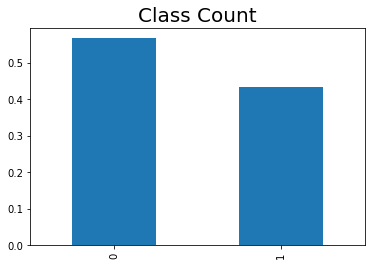

In [74]:
train_df["Class"].value_counts(normalize = True).plot.bar() 

plt.title('Class Count', fontsize = 20)

plt.show()

Figure 1: Class Distribution of the target column in the 2014 Financial indicator training dataset.

A table, such as Table 1, is good to display data, however, it is mostly preferred to use a visual representation. We can see from Figure 1 that there isn't much of a class imbalance. This shows that we can build an ML pipeline without having to deal with a class imbalance.